<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Чтоб генерировалось известное проверяющим и постоянные для нас наборы случайных значений

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [54]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [55]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [4]:
import pandas as pd
from ydata_profiling import ProfileReport

miss_cols = df_train.columns[df_train.isnull().any()].tolist()
print("Колонки с пропущенными значениями:", miss_cols)
duplicates = df_train.duplicated().sum()
print("Количество явных дубликатов:", duplicates)

profile = ProfileReport(df_train, title="Pandas Profiling Report", explorative=True)
profile.to_file("profiling_report.html")


C:\Users\Дан\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Колонки с пропущенными значениями: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Количество явных дубликатов: 985


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.50it/s]


- Наиболее значимые корреляции между ценой продажи и годом, ценой продажи и трансмисией
- В основном 5 местные значения
- Преобладание ручной трансмисии
- В основном данные с 2010 года по 2020 год
- seller_type не сбалансирован
- Сильная корреляция между годом и проеханными километрами

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [28]:
train_num_stats = df_train.describe(include=[np.number])
test_num_stats = df_test.describe(include=[np.number])
print("Основные статистики по числовым столбцам для train:")
print(train_num_stats)
print("Основные статистики по числовым столбцам для test:")
print(test_num_stats)

Основные статистики по числовым столбцам для train:
              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000
Основные статистики по числовым столбцам для test:
              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.0

In [29]:
train_cat_stats = df_train.describe(include=[object])
test_cat_stats = df_test.describe(include=[object])

print("Основные статистики по категориальным столбцам для train:")
print(train_cat_stats)

print("\nОсновные статистики по категориальным столбцам для test:")
print(test_cat_stats)

Основные статистики по категориальным столбцам для train:
                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468  

Основные статистики по категориальным столбцам для test:
                       name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3       

Сравнение:

In [30]:
train_mean = df_train.mean(numeric_only=True)
train_median = df_train.median(numeric_only=True)
test_mean = df_test.mean(numeric_only=True)
test_median = df_test.median(numeric_only=True)

mean_comparison = pd.DataFrame({
    "Train Mean": train_mean,
    "Test Mean": test_mean,
    "Train Median": train_median,
    "Test Median": test_median
})

print("Сравнение средних и медиан между train и test:")
print(mean_comparison)


Сравнение средних и медиан между train и test:
                  Train Mean      Test Mean  Train Median  Test Median
year             2013.818403    2013.681000        2015.0       2014.0
selling_price  639515.197171  617901.042000      450000.0     434999.0
km_driven       69584.615517   71393.341000       60000.0      61500.0
seats               5.419008       5.410805           5.0          5.0


В целом train и test достаточно похожи друг на друга с точки зрения статистик

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [56]:
duplicates_count = df_train.drop(columns="selling_price").value_counts()
duplicates_count = duplicates_count[duplicates_count > 1]
duplicates_len = len(duplicates_count)
print(f'Число повторюшек: {duplicates_len}. Считаем только уникальные строки, которые повторяются')
duplicates_count.head()

Число повторюшек: 624. Считаем только уникальные строки, которые повторяются


name                                    year  km_driven  fuel    seller_type       transmission  owner         mileage     engine   max_power   torque               seats
Honda Amaze V CVT Petrol BSIV           2019  7032       Petrol  Trustmark Dealer  Automatic     First Owner   19.0 kmpl   1199 CC  88.76 bhp   110Nm@ 4800rpm       5.0      30
Lexus ES 300h                           2019  20000      Petrol  Dealer            Automatic     First Owner   22.37 kmpl  2487 CC  214.56 bhp  202Nm@ 3600-5200rpm  5.0      30
Jaguar XF 2.0 Diesel Portfolio          2017  45000      Diesel  Dealer            Automatic     First Owner   19.33 kmpl  1999 CC  177 bhp     430Nm@ 1750-2500rpm  5.0      28
Toyota Innova 2.5 VX (Diesel) 7 Seater  2013  79328      Diesel  Trustmark Dealer  Manual        Second Owner  12.99 kmpl  2494 CC  100.6 bhp   200Nm@ 1200-3600rpm  7.0      28
BMW X4 M Sport X xDrive20d              2019  7500       Diesel  Dealer            Automatic     First Owner   16.78 kmpl

In [57]:
# Удалим лишних
df_train_unique = df_train.drop_duplicates(subset=[col for col in df_train.columns if col != "selling_price"],keep="first",ignore_index=True)

In [58]:
#Доп. проверочка
df_train_unique.duplicated().sum()

np.int64(0)

In [59]:
df_train = df_train_unique

In [60]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [61]:
import re
# Функция для обработки Milleage
def mileage_filtr(value):
    pattern = r"(\S+)\s+(.+)"
    if value is not np.nan:
        match = re.match(pattern, value)
    else: 
        return np.nan
    before_space = match.group(1)
    after_space = match.group(2)
    if after_space == 'kmpl':
        return np.float64(before_space)
    elif after_space =='km/kg':
        return np.float64(before_space)*0.74
# Функция для обработки engine
def engine_filtr(value):
    pattern = r"(\S+)\s+(.+)"
    if value is not np.nan:
        match = re.match(pattern, value)
    else: 
        return np.nan
    before_space = match.group(1)
    after_space = match.group(2)
    if after_space == 'CC':
        return np.int64(before_space)
df_train['mileage'] = df_train['mileage'].apply(mileage_filtr)
df_test['mileage'] = df_test['mileage'].apply(mileage_filtr)

In [62]:
df_train['engine'] = df_train['engine'].apply(engine_filtr)
df_test['engine'] = df_test['engine'].apply(engine_filtr)

In [63]:
# Функция для обработки power
def max_power_filtr(value):
    pattern = r"(\S+)\s+(.+)"
    
    # Проверка на NaN и пустые значения
    if pd.isna(value) or value.strip() == '0' or value.strip() == 'bhp':
        return np.nan
    
    match = re.match(pattern, value)
    if match:  
        before_space = match.group(1)
        after_space = match.group(2)
        
        if after_space == 'bhp':
            return np.float64(before_space)
    
    return np.nan  

df_train.loc[:,'max_power'] = df_train['max_power'].apply(max_power_filtr)
df_test.loc[:,'max_power'] = df_test['max_power'].apply(max_power_filtr)


In [64]:
# Обновленная функция для обработки и разделения признака torque на torque и max_torque_rpm
def preprocess_torque(value):
    if pd.isna(value):
        return np.nan, np.nan
    value = value.replace(',', '')  # Заменяем запятые на точки
    at_symbol_count = value.count('@')
    at_word_count = value.lower().split().count('at')
    
    def convert_to_nm(num, unit):
        if unit.lower() == 'kgm':
            return num * 9.80665
        elif unit.lower() == 'nm':
            return num
        return None  # Игнорируем 'rpm' и другие нераспознанные единицы
    
    # Если '@' или 'at' встречается один раз, обрабатываем обычный случай
    if at_symbol_count == 1 or at_word_count == 1:
        matches = re.findall(r'(\d+(?:\.\d+)?)\s*(kgm|Nm|rpm)', value, re.IGNORECASE)
        torque_value, rpm_value = np.nan, np.nan
        for num, unit in matches:
            if unit.lower() == 'rpm':
                rpm_value = float(num)
            else:
                torque_value = convert_to_nm(float(num), unit)
        return torque_value, rpm_value
    
    # Обработка сложного случая "число@ число(размерность@ размерность)"
    match = re.search(r'(\d+(?:\.\d+)?)@\s*(\d+(?:\.\d+)?)\((\w+)@\s*(\w+)\)', value) #Спс chatgpt
    if match:
        num1 = float(match.group(1))
        num2 = float(match.group(2))
        unit1 = match.group(3)
        unit2 = match.group(4)
        torque_value = convert_to_nm(num1, unit1)
        rpm_value = num2 if unit2.lower() == 'rpm' else np.nan
        return torque_value, rpm_value
    
    return np.nan, np.nan  

# Применение функции для разделения признака 'torque' на два новых признака
df_train[['torque','max_torque_rpm']] = df_train['torque'].apply(lambda x: pd.Series(preprocess_torque(x)))
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: pd.Series(preprocess_torque(x)))


In [65]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.0,190.000000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.0,219.668960,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,112.776475,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0


In [66]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172.0,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200.0,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96.0,5.0,3000.0


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






Заполни пропуски медианнами из train, приведем для начала типы

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5653 non-null   object 
 11  torque          5538 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5535 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 638.9+ KB


In [69]:
df_train['torque'] = pd.to_numeric(df_train['torque'], errors='coerce').astype('float64')
df_train['engine'] = pd.to_numeric(df_train['engine'], errors='coerce').astype('Int64')
df_train['mileage'] = pd.to_numeric(df_train['mileage'], errors='coerce').astype('float64')
df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce').astype('float64')

In [70]:
# Вычисляем медианы для каждого столбца тренировочного набора
median_values = df_train.median(numeric_only=True)
# Заполняем пропуски медианами для train и test наборов
df_train.fillna(median_values, inplace=True)
df_test.fillna(median_values, inplace=True)

C:\Users\Дан\AppData\Local\Temp\ipykernel_13120\4013415863.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.fillna(median_values, inplace=True)


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   Int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: Int64(1), float64(5), int64(3), object(5)
memory usage: 644.6+ KB


In [72]:
# Проверяем, что пропуски заполнены
assert df_train.isna().sum().sum() == 0, "Есть пропуски в df_train"
assert df_test.isna().sum().sum() == 0, "Есть пропуски в df_test"

assert df_train.isnull().sum().sum() == 0, "Есть нули в df_train"
assert df_test.isnull().sum().sum() == 0, "Есть нули в df_test"

Заполняем медианой, так как она представляет типичное значение переменной, и менее подвержена выбросам.

Берем медиану из train, в том числе для заполнения тестовых данных. тем самым мы убираем проблему связанную с data leakage.  И мы все еще никак не задействуем тестовые данные в своем обучение.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [73]:
df_train.loc[:,'seats'] = pd.to_numeric(df_train['seats'], errors='coerce').astype('int64')

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   Int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: Int64(1), float64(5), int64(3), object(5)
memory usage: 644.6+ KB


Так как в seats всего 9 различающихся значений, то можно их таким образом поделить на классы и понимать, как категориальные фичи

**Также из-за малого количества уникальных элементов я бы использовал моду, так как есть явный преобладающий тип, стоит брать наиболее вероятный элемент распределения**

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [75]:
# Основные статистики для числовых столбцов в train и test
train_num_stats = df_train.describe(include=[np.number])
test_num_stats = df_test.describe(include=[np.number])
print("Основные статистики по числовым столбцам для train:")
print(train_num_stats)
print("Основные статистики по числовым столбцам для test:")
print(test_num_stats)
train_cat_stats = df_train.describe(include=[object])
test_cat_stats = df_test.describe(include=[object])

print("Основные статистики по категориальным столбцам для train:")
print(train_cat_stats)

print("\nОсновные статистики по категориальным столбцам для test:")
print(test_cat_stats)

Основные статистики по числовым столбцам для train:
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000       5840.0   
mean   2013.428425   5.229601e+05  7.395224e+04    19.353641  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.967288   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000        624.0   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000       1197.0   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000       1248.0   
75%    2017.000000   6.400000e+05  1.000000e+05    22.070000       1498.0   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000       3604.0   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.948422   174.042416     5.426712     3038.896918  
std      31.577884   106.531061     0.982344      912.433682  
mi

Сдвиг конечно же мог появиться если бы пропусков было очень много. Однако медиана минимизирует этот сдвиг, из-за меньшей чувствительности к выбросам.

В самом хуждшем случае снизится дисперсия, и при наличие ассиметрии, распределение станет более симметричными, концентрируясь около медианы

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [117]:
%matplotlib inline

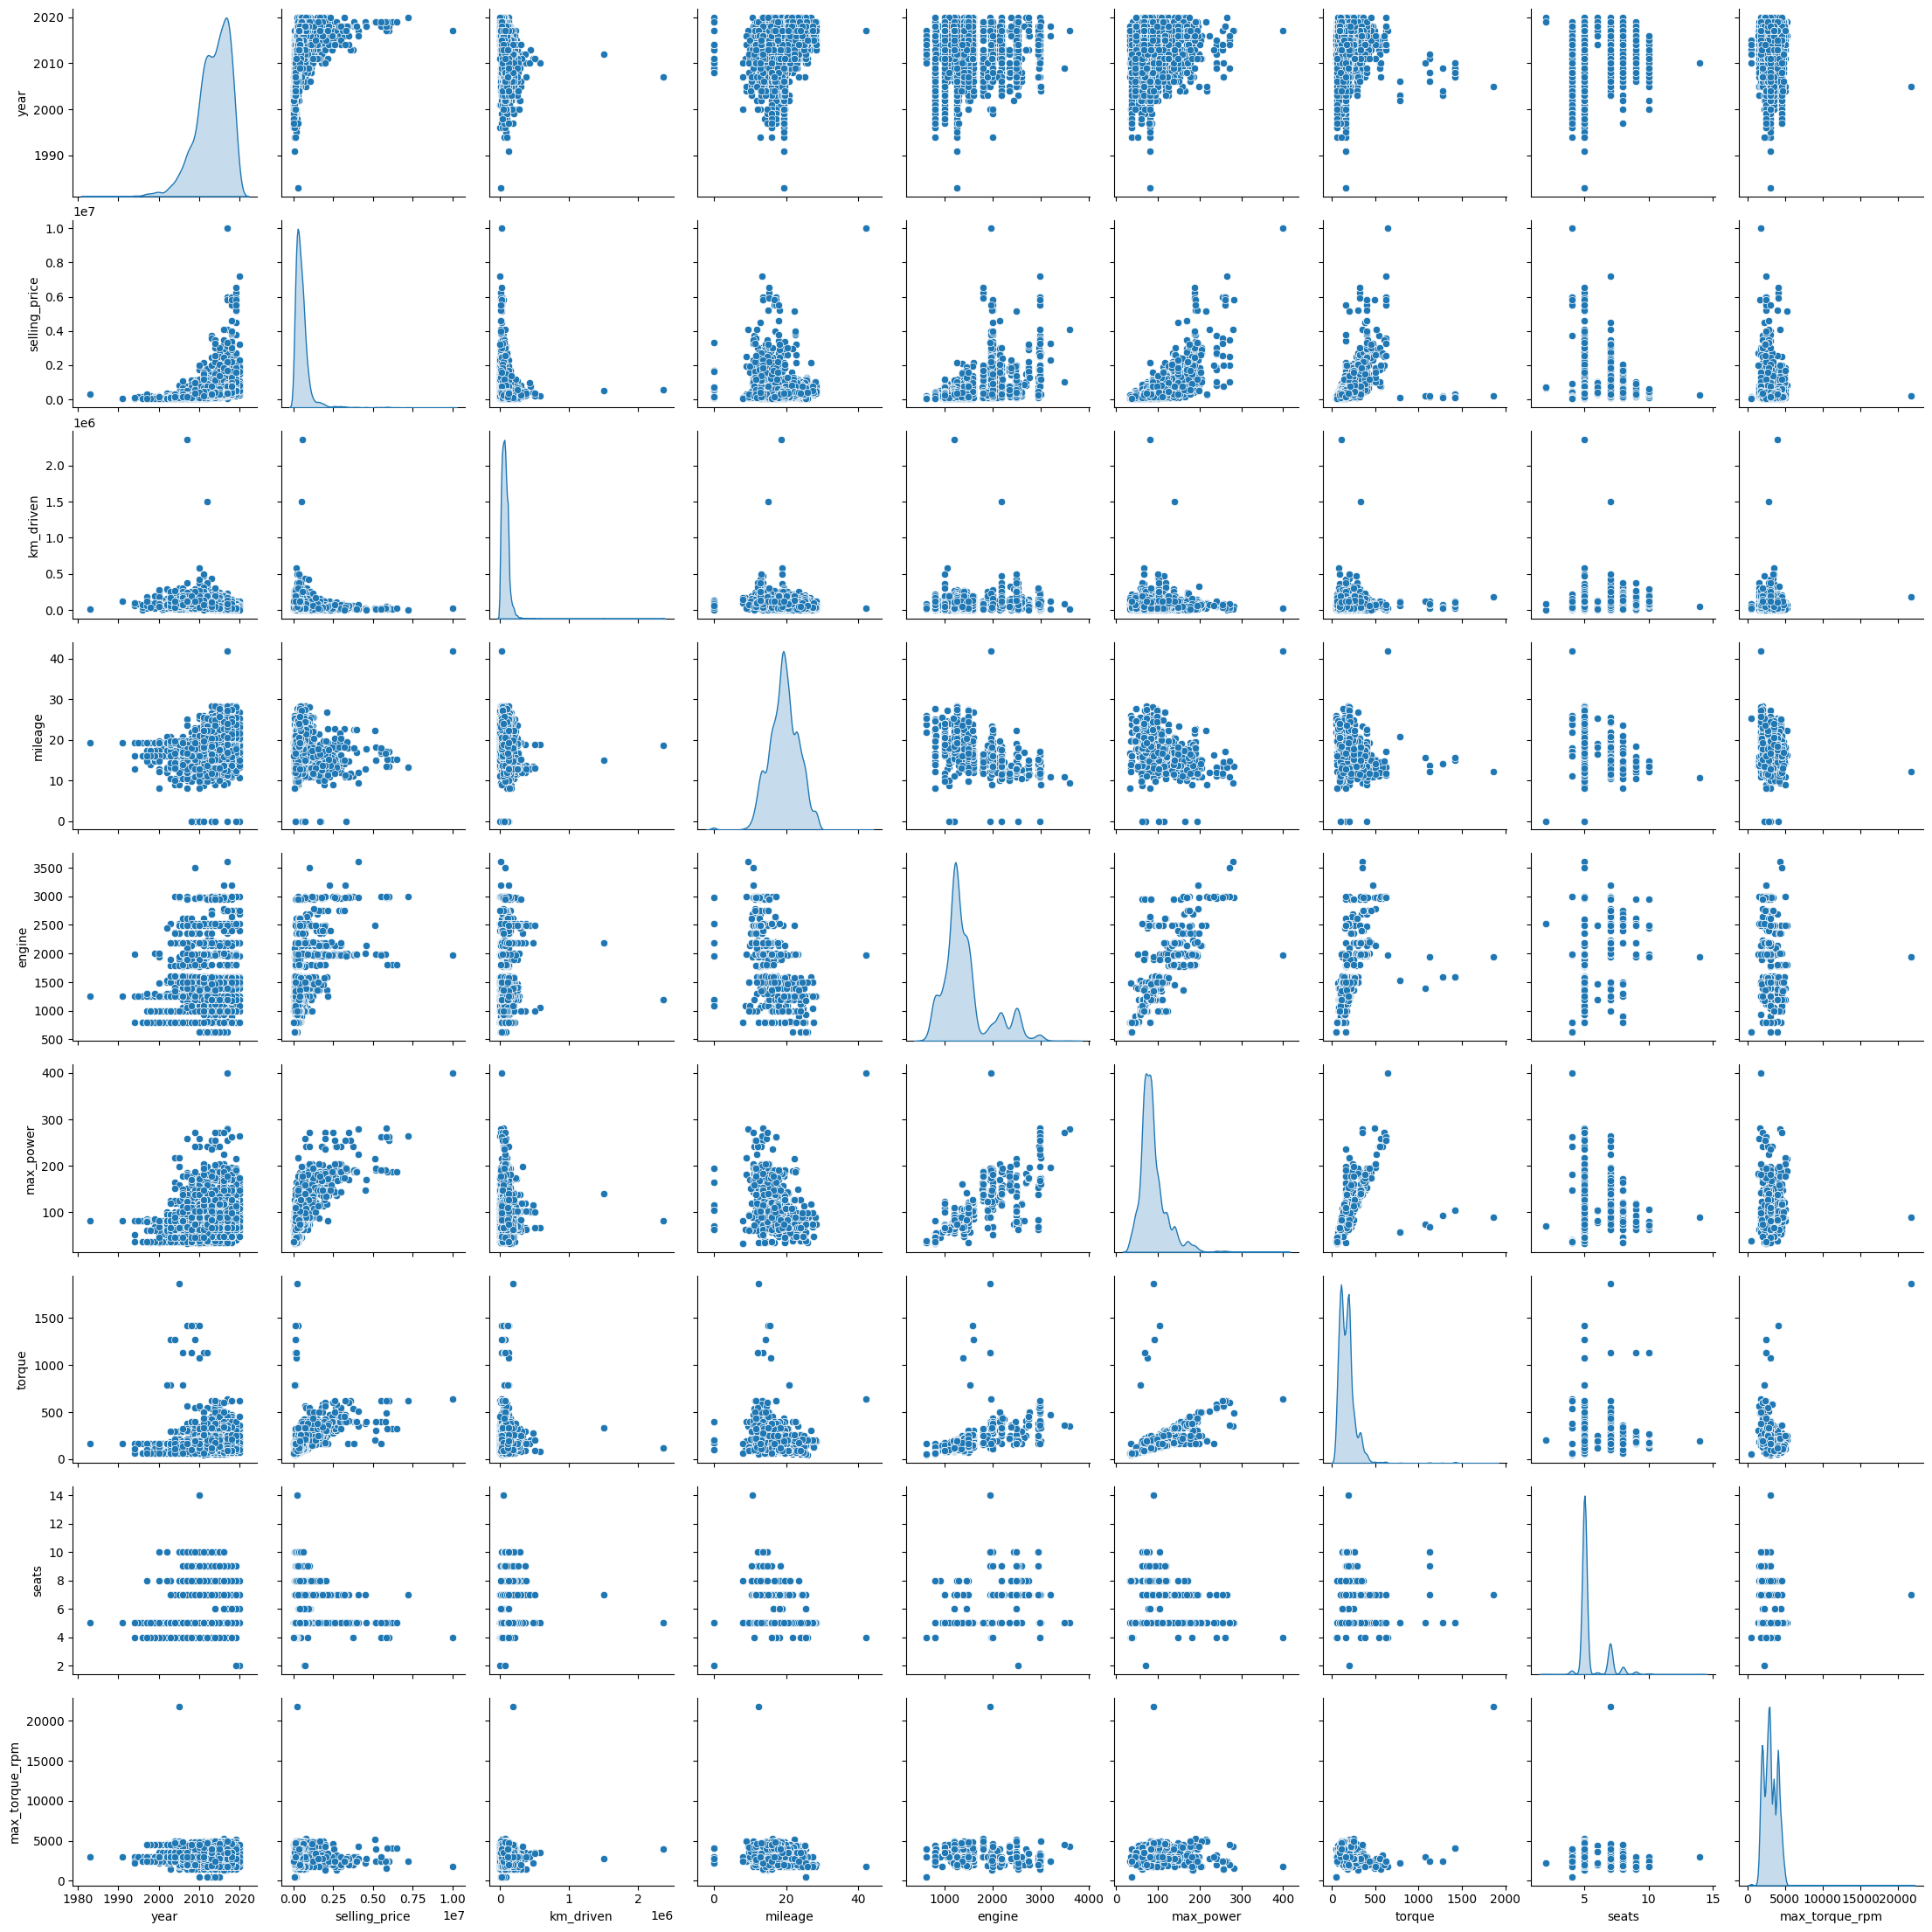

In [40]:
pairplot_train = sns.pairplot(df_train, diag_kind="kde")

selling_price(целевая переменная) на основе графиков видна связь с year(нелинейная), max_power, torque,engine

engine коррелирует с max_power и torque
torque с engine

По остальным парам признаков ничего конкретного сказать нельзя

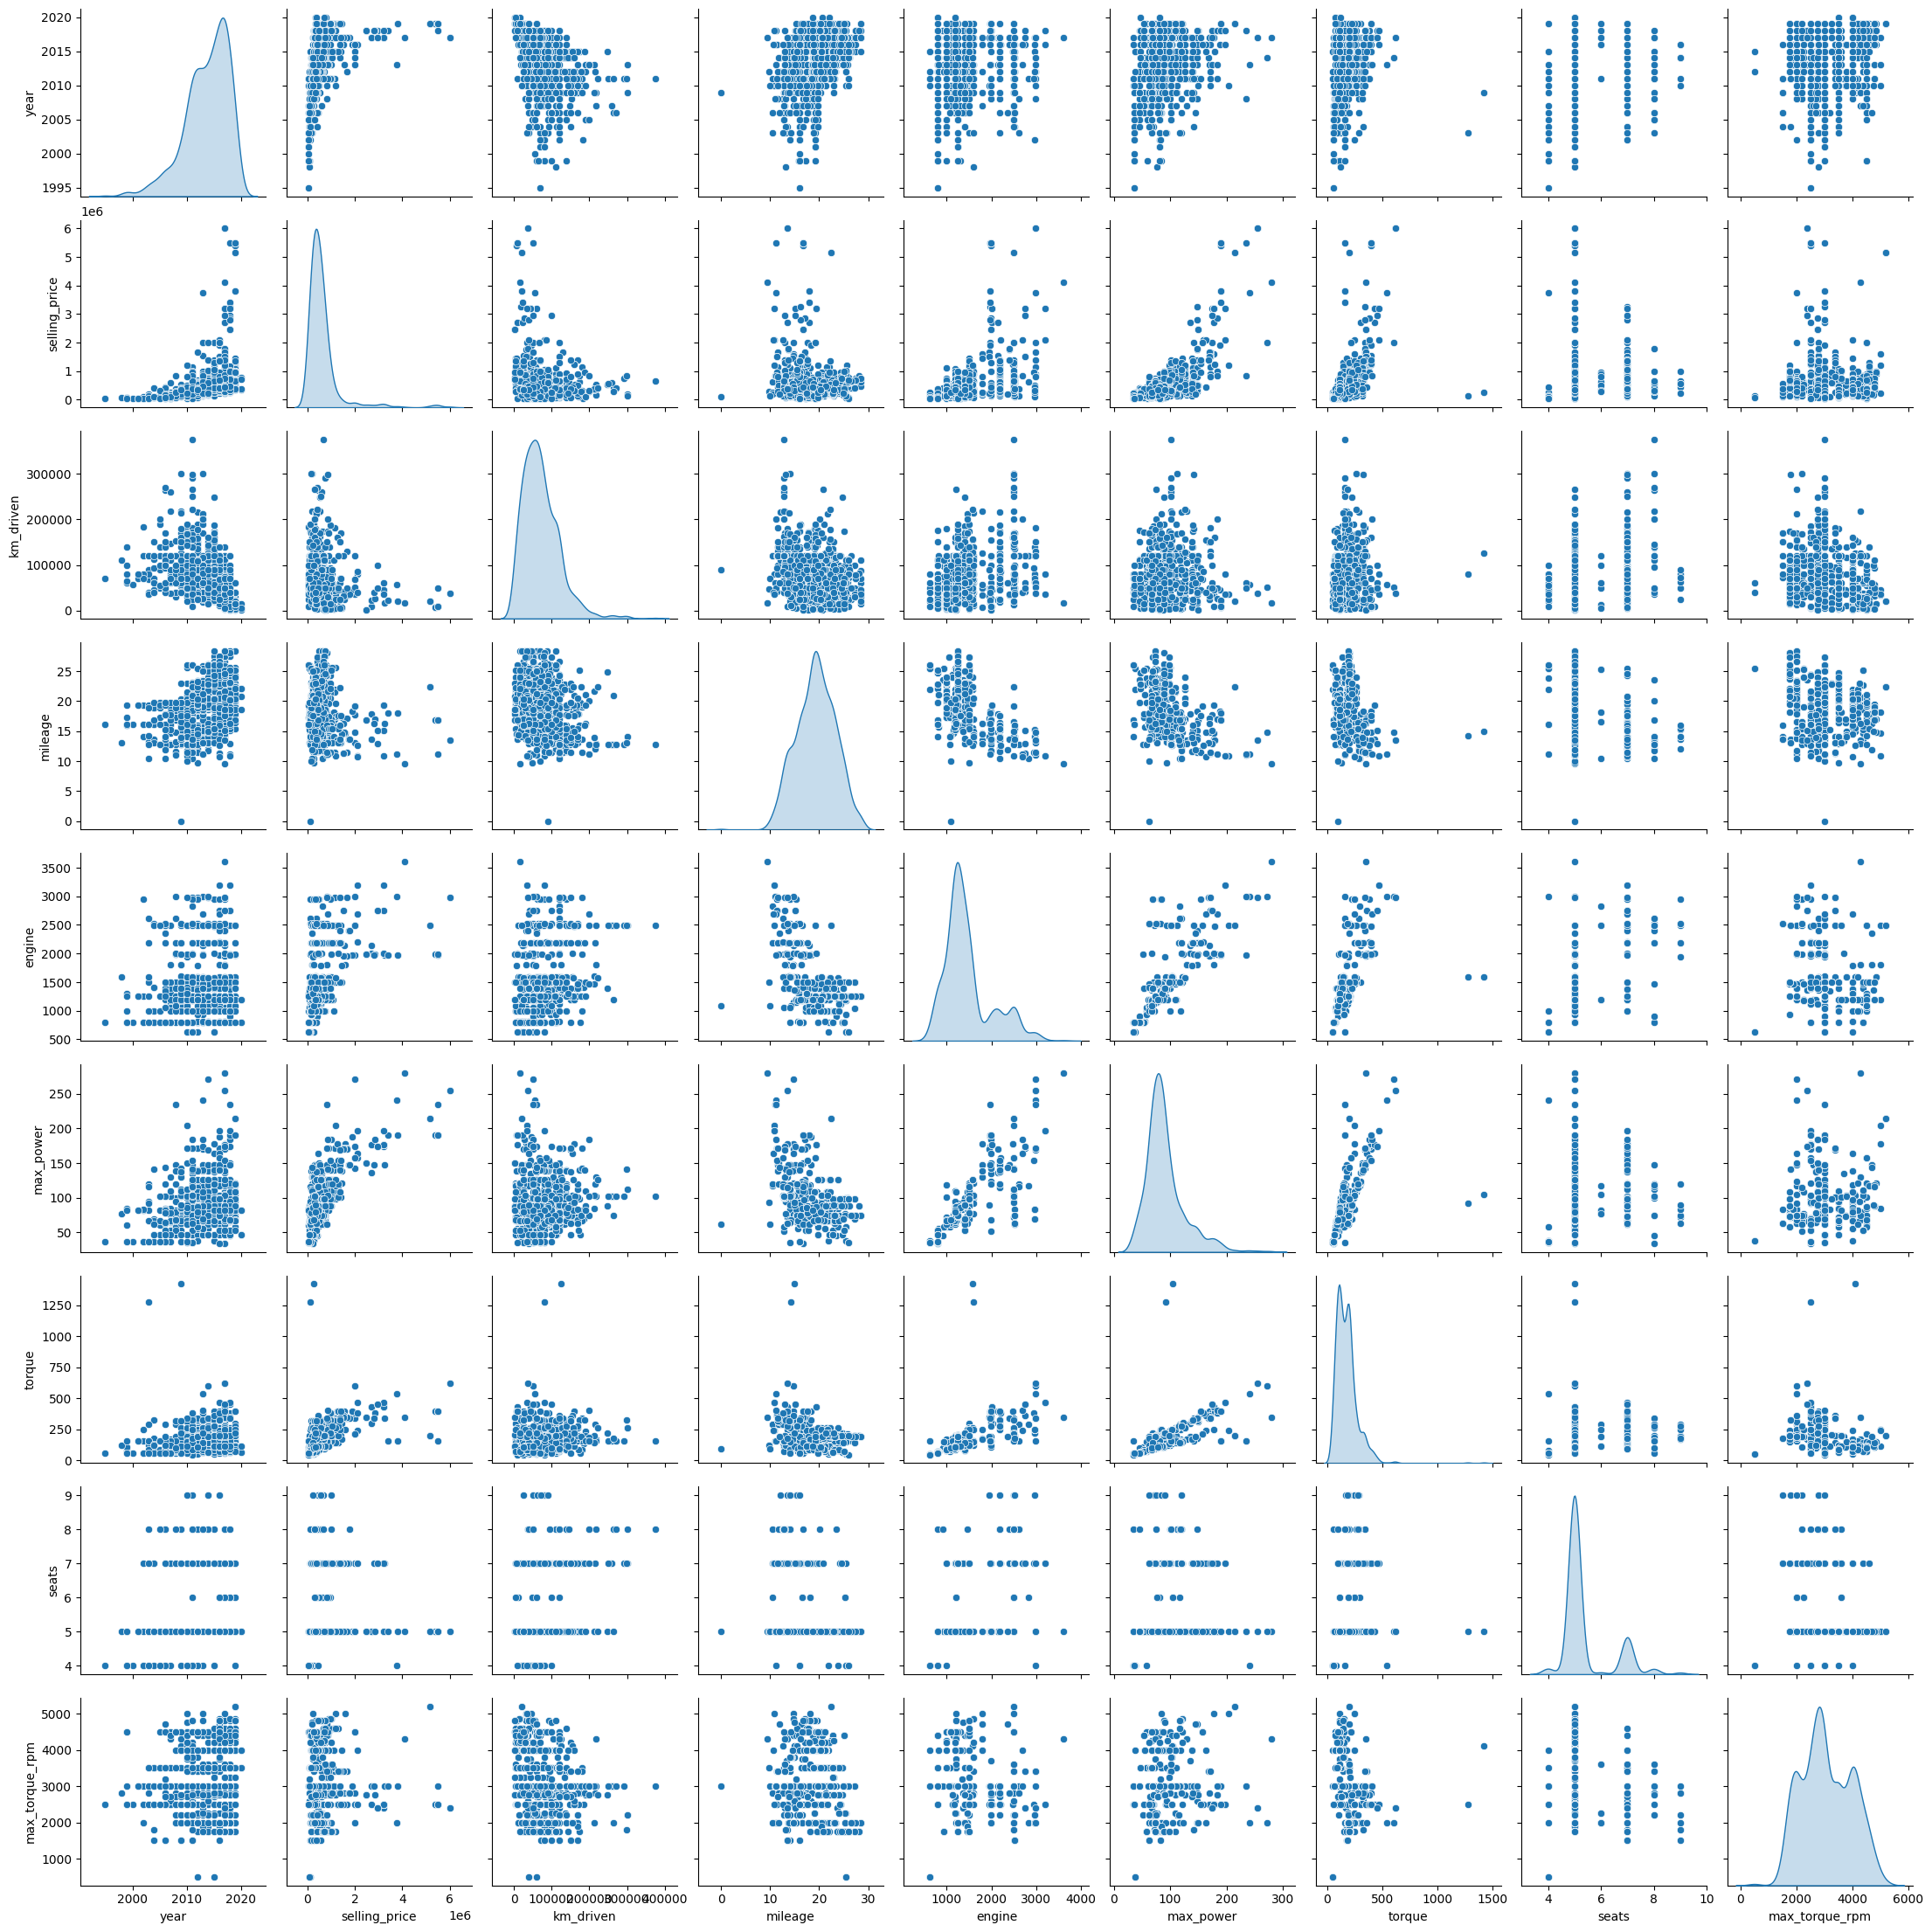

In [41]:
pairplot_train = sns.pairplot(df_test, diag_kind="kde")

В тестовых данных как-будто чуть лучше видна зависимость selling_price И km_driven
и корреляция km_driven и year, ,milleage И engine

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

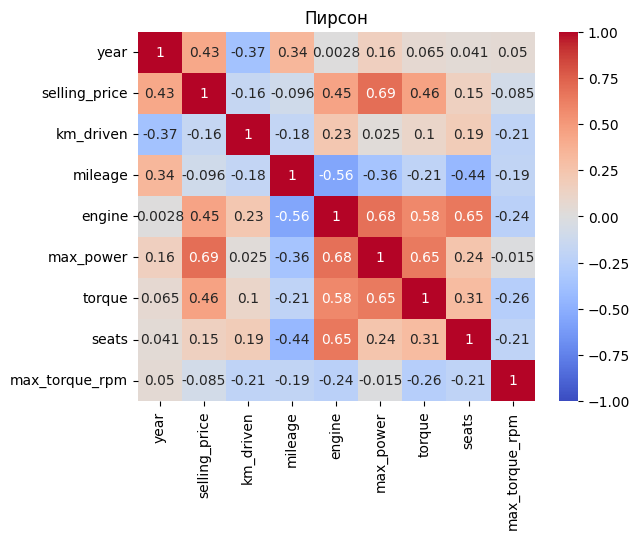

In [42]:
correlation_matrix = df_train.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Пирсон")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- Наименее скоррелированы year и engine
- сильная положительная связь наблюдается между selling_price и max_power, а также между engine и max_power, engine и torque, engine И seats
- корреляция между year И km_driven отрицательная и равна -0.37 следовательно можно

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


Корреляция Спирмена очень похожа на Пирсона, только используются [ранжированные значения](https://en.wikipedia.org/wiki/Ranking_(statistics))

In [105]:
import numpy as np
import pandas as pd

columns = df_train.select_dtypes(include=["number"]).columns
ranks = df_train[columns].apply(lambda col: np.argsort(np.argsort(col.values)))

spearman_matrix = np.corrcoef(ranks.T)

spearman_matrix = pd.DataFrame(spearman_matrix, index=columns, columns=columns)

print("Самодельный Спирмен")
print(spearman_matrix)

# Сравнение с библиотечной реализацией
print("pandas spearmen")
print(df_train.corr(method='spearman', numeric_only=True))


Самодельный Спирмен
                    year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.705000  -0.567515  0.343635 -0.038890   
selling_price   0.705000       1.000000  -0.295361  0.034890  0.462853   
km_driven      -0.567515      -0.295361   1.000000 -0.199081  0.302392   
mileage         0.343635       0.034890  -0.199081  1.000000 -0.413734   
engine         -0.038890       0.462853   0.302392 -0.413734  1.000000   
max_power       0.165981       0.611965   0.041106 -0.291670  0.711069   
torque          0.122463       0.582296   0.227545 -0.111268  0.821096   
seats           0.020476       0.214398   0.160072 -0.300811  0.375382   
max_torque_rpm  0.076848      -0.124828  -0.316888 -0.188342 -0.363057   

                max_power    torque     seats  max_torque_rpm  
year             0.165981  0.122463  0.020476        0.076848  
selling_price    0.611965  0.582296  0.214398       -0.124828  
km_driven        0.041106  0.227545  0.160072  

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.heatmap(spearman_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=axes[0])
axes[0].set_title("Самодельная корреляционная матрица Спирмена")
sns.heatmap(df_train.corr(method='spearman', numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=axes[1])
axes[1].set_title("pandas корреляционная матрица Спирмена")
plt.tight_layout()
plt.show()

C:\Users\Дан\AppData\Local\Temp\ipykernel_6316\204434960.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


[]

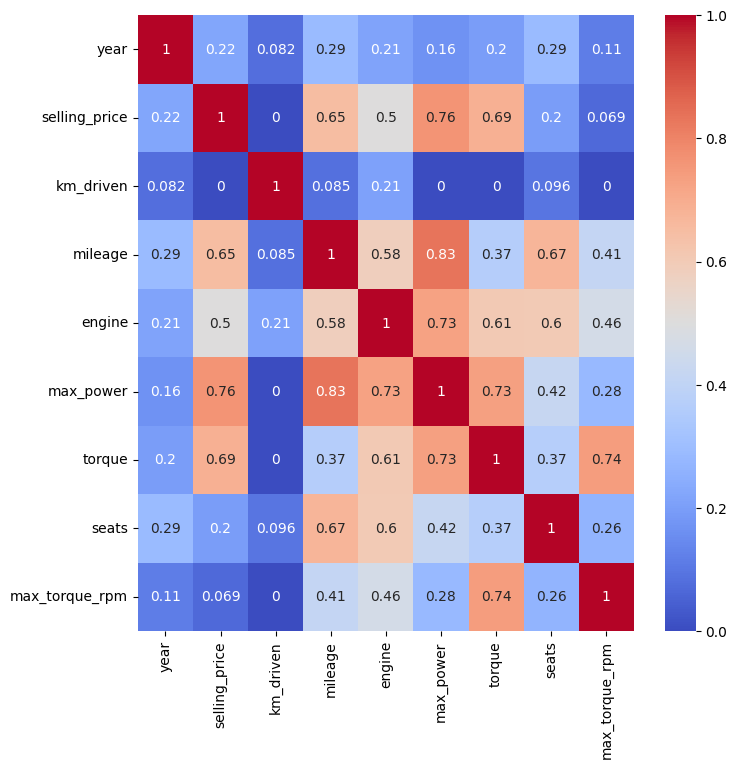

In [119]:
import pandas as pd
import phik 
phik_matrix = df_train.select_dtypes(include=[np.number]).phik_matrix()
# Создание тепловой карты
plt.figure(figsize=(8, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.plot()


Исходя из графиков видна сильная корреляция следующего c таргетной переменной, остальные зависимости можно увидеть из графика

- selling_price с mileage ,engine, max_power, torque, year

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Вроде все есть

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [76]:
df_without_cat = df_train.select_dtypes(include=[np.number])#УБираем категориальные фичи

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_without_cat.drop(columns="selling_price"), df_without_cat["selling_price"], test_size=0.2, random_state=42)

In [78]:
X_train.shape

(4672, 8)

In [79]:
X_test.shape

(1168, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_train_pred = model_linear.predict(X_train)
y_test_pred = model_linear.predict(X_test)

# Расчет метрик
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

# Вывод результатов
print(f"Тренировочная выборка: R^2 = {train_r2:.10f}, MSE = {train_mse:.4f}")
print(f"Тестовая выборка: R^2 = {test_r2:.4f}, MSE = {test_mse:.4f}")

Тренировочная выборка: R^2 = 0.6094190661, MSE = 104627212574.1505
Тестовая выборка: R^2 = 0.5603, MSE = 158990213470.2350


Не переобучились, что уже хорошо, по MSE ничего сказать не можем не понятно насколько это большое или маленькое значение, $R^2$ не очень высокий, но и не равен нулю :))

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [81]:
def R_2(y,y_ideal):
    y_mean = np.mean(y_ideal)
    a_1 = np.sum((y_ideal - y) ** 2)  # Сумма квадратов остатков
    a_2 = np.sum((y_ideal - y_mean) ** 2)  # Общая сумма квадратов
    return 1 - (a_1 / a_2)
print(f"Рассчитанное тренировочные вручную R^2: {R_2(y_train_pred,y_train):.4f}")
print(f"Рассчитанное тестовое вручную R^2: {R_2(y_test_pred,y_test):.4f}")

Рассчитанное тренировочные вручную R^2: 0.6094
Рассчитанное тестовое вручную R^2: 0.5603


a_1 - Это не нормированная MAE 
a_2 - нормировка на дисперсию.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [82]:
def adjusted_R2(r2, n, k):
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return adj_r2

n = len(y_train)  # Количество наблюдений
k = X_train.shape[1]
adj_r2_manual = adjusted_R2(R_2(y_train_pred,y_train), n, k)
print(f"Adjusted R^2 для тренировочной: {adj_r2_manual:.4f}")


Adjusted R^2 для тренировочной: 0.6087


- Учитывает сложность модели (количество признаков).(если добавили полезный признак коэффициент увеличится, иначе уменьшится)
- Предотвращает выбор избыточно сложных моделей.
- Полезен при сравнении моделей с разным количеством признаков.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

Не будем стандартизировать таргетную переменную

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Создание pipeline, так проще объединять
model_linear_normal = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', LinearRegression()) 
])


model_linear_normal.fit(X_train, y_train)

y_train_pred = model_linear_normal.predict(X_train)
y_test_pred = model_linear_normal.predict(X_test)


train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

# Вывод результатов
print(f"Тренировочная выборка: R^2 = {train_r2:.10f}, MSE = {train_mse:.4f}")
print(f"Тестовая выборка: R^2 = {test_r2:.4f}, MSE = {test_mse:.4f}")


Тренировочная выборка: R^2 = 0.6094190661, MSE = 104627212574.1502
Тестовая выборка: R^2 = 0.5603, MSE = 158990213470.2345


Ничего не поменялось(((

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [84]:
# Получение коэффициентов модели
coefficients = model_linear_normal.named_steps['model'].coef_
for ind,col in enumerate(X_train.columns):
    print(coefficients[ind],col)

163980.94695151784 year
-69267.49280459373 km_driven
-25382.45828597735 mileage
39312.58592293216 engine
305031.46386276005 max_power
-1706.2044346873718 torque
-36003.57559002986 seats
-69393.93649583167 max_torque_rpm


Сильнее всего влияет year и max_power для этой модели

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [85]:
from sklearn.linear_model import Lasso

# Создание pipeline для Lasso
model_normal_lasso = Pipeline([
    ('scaler', StandardScaler()),  
    ('lasso', Lasso())          
])

model_normal_lasso.fit(X_train, y_train)
y_train_pred = model_normal_lasso.predict(X_train)
y_test_pred = model_normal_lasso.predict(X_test)

train_r2_lasso = r2_score(y_train, y_train_pred)
test_r2_lasso = r2_score(y_test, y_test_pred)
train_mse_lasso = MSE(y_train, y_train_pred)
test_mse_lasso = MSE(y_test, y_test_pred)

print(f"Lasso Regression - Тренировочная выборка: R^2 = {train_r2_lasso:.4f}, MSE = {train_mse_lasso:.4f}")
print(f"Lasso Regression - Тестовая выборка: R^2 = {test_r2_lasso:.4f}, MSE = {test_mse_lasso:.4f}")

Lasso Regression - Тренировочная выборка: R^2 = 0.6094, MSE = 104627212595.2969
Lasso Regression - Тестовая выборка: R^2 = 0.5603, MSE = 158989371146.8340


In [86]:
# Получение коэффициентов модели
coefficients = model_normal_lasso.named_steps['lasso'].coef_
for ind,col in enumerate(X_train.columns):
    print(coefficients[ind],col)

163979.03317836596 year
-69266.19043269072 km_driven
-25379.217041066982 mileage
39310.031480956546 engine
305030.38919332944 max_power
-1702.3859155328933 torque
-35999.862534560394 seats
-69390.4543649094 max_torque_rpm


Может стандартные параметры не достаточно регуляризуют нашу задачу из-за этого не зануления параметров

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [87]:
X = df_without_cat.drop(columns="selling_price")
y = df_without_cat["selling_price"]

In [88]:
from sklearn.model_selection import GridSearchCV
import time
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 10**4, 2*10**4, 3*10**4, 10**5, 10**6]
}
# Создание пайплайна
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())            
])
# Инициализация GridSearchCV с 10 фолдами
grid_search_lasso = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,         # Количество фолдов
    n_jobs=-1      # Используем все ядра для ускорения
)

start = time.time()
grid_search_lasso.fit(X, y)
end = time.time()

best_alpha = grid_search_lasso.best_params_['model__alpha']
print(f"Оптимальный коэффициент регуляризации (alpha): {best_alpha}")

best_r2 = grid_search_lasso.best_score_
print(f"Лучший R^2 на кросс-валидации: {best_r2:.4f}")
print(f'Время на обучение: {end - start}')


Оптимальный коэффициент регуляризации (alpha): 20000
Лучший R^2 на кросс-валидации: 0.5833
Время на обучение: 8.0998854637146


Для param_grid я подбирал только гиперпараметр члена связанного с регуляризацией, который мы не обучаем

Также не искал прецизионно коэффициент, но при $\alpha = 2000$ лучшее

In [89]:
best_model = grid_search_lasso.best_estimator_.named_steps['model']

coefficients = best_model.coef_
for ind,col in enumerate(X.columns):
    print(coefficients[ind],col)

148333.38516571707 year
-28535.517150212167 km_driven
0.0 mileage
0.0 engine
328311.2217323442 max_power
0.0 torque
-0.0 seats
-33900.90967662062 max_torque_rpm


Видим зануление коэффициентов!!Магия(математика)

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [90]:
from sklearn.linear_model import ElasticNet
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],
    'model__l1_ratio': [0.001, 0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0]
}
# Создание пайплайна
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', ElasticNet())     
])

# Инициализация GridSearchCV с 10 фолдами
grid_search_elastic_net = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,         # Количество фолдов
    n_jobs=-1      # Используем все ядра
)

# Обучение грид-сёрча
start = time.time()
grid_search_elastic_net.fit(X, y)
end = time.time()

# Результаты
best_params = grid_search_elastic_net.best_params_
best_r2 = grid_search_elastic_net.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучший R^2 на кросс-валидации: {best_r2:.4f}")
print(f'Время на обучение: {end - start}')


Лучшие параметры: {'model__alpha': 1, 'model__l1_ratio': 0.9}
Лучший R^2 на кросс-валидации: 0.5816
Время на обучение: 3.5079963207244873


In [91]:
best_model = grid_search_elastic_net.best_estimator_.named_steps['model']

coefficients = best_model.coef_
for ind,col in enumerate(X.columns):
    print(coefficients[ind],col)

154141.03238245365 year
-50921.3973120678 km_driven
-3141.865714984305 mileage
51768.93631601545 engine
273427.0468337253 max_power
28637.625274711012 torque
-32514.91878021172 seats
-42667.14454761181 max_torque_rpm


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



$$
L_{c0}(\theta) = \beta \| \theta \|_0 = \beta \sum_{j=1}^{|\theta|} I[\theta_j \neq 0]
$$


In [92]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [93]:
import re

def extract_first_two_words_regex(text):
    if not isinstance(text, str):
        return ""
    # Используем регулярное выражение для поиска первых двух слов
    match = re.match(r'(\S+\s*\S*)', text.strip())
    return match.group(1) if match else ""

def extract_first_word_regex(text):
    if not isinstance(text, str):
        return ""
    # Используем регулярное выражение для поиска первого слова
    match = re.match(r'(\S+\s*)', text.strip())
    return match.group(1) if match else ""

# Применяем функцию к столбцу
df_train['first_two_words'] = df_train['name'].apply(extract_first_two_words_regex)
df_train['first_words'] = df_train['name'].apply(extract_first_word_regex)

print(len(df_train['first_two_words'].value_counts()))
print(len(df_train['first_words'].value_counts()))

205
30


Если выделять по два слова, то получается слишком много классов на первый взгляд(205), попробуем поступить следующим образом, будем иметь две стратегии
1. Оставляем только первое слово в name
2. Оставляем два слова, если этот элемент колонки встречается больше 50 раз, иначе оставляем 1 слово

In [94]:
word_counts = df_train['first_two_words'].value_counts()

df_train['choice'] = df_train['first_two_words'].apply(lambda x: word_counts[x] >= 50)

In [95]:
df_train['name'] = df_train.apply(
    lambda row: row['first_two_words'] if row['choice'] else row['first_words'], axis=1)

In [96]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,first_two_words,first_words,choice
0,Maruti Swift,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5.0,2000.0,Maruti Swift,Maruti,True
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5.0,2500.0,Skoda Rapid,Skoda,False
2,Hyundai i20,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5.0,2750.0,Hyundai i20,Hyundai,True
3,Maruti Swift,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5.0,4500.0,Maruti Swift,Maruti,True
4,Hyundai Xcent,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5.0,4000.0,Hyundai Xcent,Hyundai,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,5.0,3000.0,Hyundai Santro,Hyundai,True
5836,Maruti Wagon,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,5.0,3500.0,Maruti Wagon,Maruti,True
5837,Hyundai i20,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,5.0,4000.0,Hyundai i20,Hyundai,True
5838,Hyundai Verna,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,160.000000,5.0,3000.0,Hyundai Verna,Hyundai,True


In [97]:
df_train = df_train.drop(columns=["first_two_words","first_words","choice"])

Посчитаем количество уникальных элементов

In [98]:
print(len(df_train['name'].value_counts()))

64


In [99]:
X_train_cat = df_train.drop(columns="selling_price")
y_train_cat = df_train["selling_price"]

In [100]:
X_train_cat.shape

(5840, 13)

In [101]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,64,4,3,2,5
top,Maruti Swift,Diesel,Individual,Manual,First Owner
freq,558,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [102]:
X_train_cat['seats'] = X_train_cat['seats'].astype('object')

In [103]:
number_col = X_train_cat.select_dtypes(include=['number']).columns

In [104]:
number_col

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm'],
      dtype='object')

In [105]:
X_train_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   km_driven       5840 non-null   int64  
 3   fuel            5840 non-null   object 
 4   seller_type     5840 non-null   object 
 5   transmission    5840 non-null   object 
 6   owner           5840 non-null   object 
 7   mileage         5840 non-null   float64
 8   engine          5840 non-null   Int64  
 9   max_power       5840 non-null   float64
 10  torque          5840 non-null   float64
 11  seats           5840 non-null   object 
 12  max_torque_rpm  5840 non-null   float64
dtypes: Int64(1), float64(4), int64(2), object(6)
memory usage: 599.0+ KB


In [106]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

categorical_columns = X_train_cat.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop = 'first')
X_train_encod = encoder.fit_transform(X_train_cat[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
X_train_cat_encoded = pd.DataFrame(X_train_encod, columns=encoded_columns, index=X_train_cat.index)
X_train_cat_encoded = pd.concat([X_train_cat.drop(columns=categorical_columns), X_train_cat_encoded], axis=1)
print(X_train_cat_encoded.head())


   year  km_driven  mileage  engine  max_power      torque  max_torque_rpm  \
0  2014     145500    23.40    1248      74.00  190.000000          2000.0   
1  2014     120000    21.14    1498     103.52  250.000000          2500.0   
2  2010     127000    23.00    1396      90.00  219.668960          2750.0   
3  2007     120000    16.10    1298      88.20  112.776475          4500.0   
4  2017      45000    20.14    1197      81.86  113.750000          4000.0   

   name_Audi   name_BMW   name_Chevrolet   ...  owner_Test Drive Car  \
0         0.0        0.0              0.0  ...                   0.0   
1         0.0        0.0              0.0  ...                   0.0   
2         0.0        0.0              0.0  ...                   0.0   
3         0.0        0.0              0.0  ...                   0.0   
4         0.0        0.0              0.0  ...                   0.0   

   owner_Third Owner  seats_4.0  seats_5.0  seats_6.0  seats_7.0  seats_8.0  \
0                0.

In [107]:
X_train_cat_encoded.isna().any().sum()

np.int64(0)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

- Проследить не появились ли новые пустые элементы, которые не попали ни в одну из категорий
- Удаляем столбец, чтоб избежать мультиколлинеарности, когда один столбец может выражаться через другие
- Некорректно просто взять и удалить может эта добавка в совокупности всех остальных признаков привносит в модель дополнительные проценты точности при оценке. Я бы убрал этот признак еще раз обучили бы модель и если качество не ухудшилось на метрике(но надо думтаь какую метрику взять), то удалил бы

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [108]:
X_train_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          5840 non-null   int64  
 1   km_driven                     5840 non-null   int64  
 2   mileage                       5840 non-null   float64
 3   engine                        5840 non-null   Int64  
 4   max_power                     5840 non-null   float64
 5   torque                        5840 non-null   float64
 6   max_torque_rpm                5840 non-null   float64
 7   name_Audi                     5840 non-null   float64
 8   name_BMW                      5840 non-null   float64
 9   name_Chevrolet                5840 non-null   float64
 10  name_Chevrolet Beat           5840 non-null   float64
 11  name_Daewoo                   5840 non-null   float64
 12  name_Datsun                   5840 non-null   float64
 13  nam

In [109]:
X_train_cat_encoded

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,name_Audi,name_BMW,name_Chevrolet,...,owner_Test Drive Car,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,2014,145500,23.40,1248,74.00,190.000000,2000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.000000,2500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,219.668960,2750.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,112.776475,4500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,113.750000,4000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,3000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,90.000000,3500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,113.700000,4000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,160.000000,3000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
param_grid = {'model__alpha': [0.01, 0.1,0.5,0.6, 1,1.1,1.2,1.3,1.4, 10, 100, 300, 400, 420, 450, 550, 1000]}
numeric_columns = number_col

# Создание `ColumnTransformer` для масштабирования числовых данных
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_columns)  
    ],
    remainder='passthrough' 
)

# Создание пайплайна
pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', Ridge())            
])

best = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',   
    cv=10,          
    n_jobs=-1       
)
best.fit(X_train_cat_encoded, y_train_cat)

# Результаты
best_alpha = best.best_params_['model__alpha']
best_r2 = best.best_score_

print(f"Лучший параметр регуляризации alpha: {best_alpha}")
print(f"Лучший R^2 на кросс-валидации: {best_r2:.4f}")


Лучший параметр регуляризации alpha: 1.3
Лучший R^2 на кросс-валидации: 0.7228


Качество модели улучшилось!

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [113]:
X_train_cat_encoded['year^2'] = X_train_cat_encoded['year']**2
X_train_cat_encoded['km_driven_inverse'] = 1/(X_train_cat_encoded['km_driven'])#Не очень мне нравится такое деление, вдруг ноль будет, но предположим, что истинного нуля не будет

In [114]:
X_train_cat_encoded=X_train_cat_encoded.drop(columns=['year^2','km_driven_inverse'])

In [115]:
X_train_cat_encoded

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,name_Audi,name_BMW,name_Chevrolet,...,owner_Test Drive Car,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,2014,145500,23.40,1248,74.00,190.000000,2000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.000000,2500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,219.668960,2750.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,112.776475,4500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,113.750000,4000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,3000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,90.000000,3500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,113.700000,4000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,160.000000,3000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
param_grid = {'alpha': [0.01, 0.1, 1,1.2, 10, 100,300,400,420,450,550,580,600,610,620,650,700, 1000]}
ridge = Ridge()

grid_search_cat_addfeat = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',   # Оптимизируем R^2
    cv=10,          # Кросс-валидация с 10 фолдами
    n_jobs=-1       # Используем все доступные ядра
)

numeric_columns = number_col

scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X_train_cat_encoded[numeric_columns])

X_scaled_numeric = pd.DataFrame(X_scaled_numeric, columns=numeric_columns, index=X_train_cat_encoded.index)
X_scaled_cat_addfeat = pd.concat([X_scaled_numeric, X_train_cat_encoded.drop(columns=numeric_columns)], axis=1)

grid_search_cat_addfeat.fit(X_scaled_cat_addfeat, y_train_cat)

best_alpha = grid_search_cat_addfeat.best_params_['alpha']
best_r2 = grid_search_cat_addfeat.best_score_

print(f"Лучший параметр регуляризации alpha: {best_alpha}")
print(f"Лучший R^2 на кросс-валидации: {best_r2:.4f}")

Лучший параметр регуляризации alpha: 1.2
Лучший R^2 на кросс-валидации: 0.7228


Чуть-чуть улучшилось

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [117]:
grid_search_cat_addfeat.best_estimator_.predict(X_scaled_cat_addfeat)

array([455465.0633605 , 554954.33543712, 398795.00132556, ...,
       378627.19695222, 182323.61091484, 237630.59366762])

In [123]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Определение бизнес-метрики
def business_metrics(y_true, y_pred):
    deviation = np.abs(y_true - y_pred) / y_true
    return np.mean(deviation <= 0.10)

# Функция проверки моделей
def evaluate_models_with_datasets(model_data_pairs, metrics):
    results = {}
    for model_name, (model, X_test, y_test) in model_data_pairs.items():
        # Использование Pipeline для обработки данных и предсказания
        y_pred = model.predict(X_test)
        metric_value = metrics(y_test, y_pred)
        results[model_name] = metric_value
    return results

# Подготовка моделей и данных
model_data_pairs = {
    'grid_search_cat_addfeat': (grid_search_cat_addfeat.best_estimator_, X_scaled_cat_addfeat, y),
    'grid_search_cat': (best_model, X_train_cat_encoded, y),
    'grid_search_lasso': (grid_search_lasso.best_estimator_, X, y),
    'model_normal': (model_normal_lasso, X_test, y_test)
}

# Оценка моделей
results = evaluate_models_with_datasets(model_data_pairs, business_metrics)

# Вывод результатов
for model_name, metric in results.items():
    print(f"Model: {model_name}, Business Metric: {metric:.4f}")


Model: grid_search_cat_addfeat, Business Metric: 0.2902
Model: grid_search_cat, Business Metric: 0.2396
Model: grid_search_lasso, Business Metric: 0.2257
Model: model_normal, Business Metric: 0.2337


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Будем штрафовать метрику за недопрогноз

In [124]:
def your_business_metric(y_true, y_pred):
    deviation = np.abs(y_true - y_pred) / y_true
    under = (y_pred < y_true) & (deviation <= 0.10)
    over = (y_pred >= y_true) & (deviation <= 0.10)
    # Недопрогнозы учитываем с меньшим весом
    score = (np.sum(over) + 0.4 * np.sum(under)) / len(y_true)
    return score

results = evaluate_models_with_datasets(model_data_pairs,your_business_metric)

# Выводим результаты
for model_name, metric in results.items():
    print(f"Model: {model_name}, MY Business Metric: {metric:.4f}")


Model: grid_search_cat_addfeat, MY Business Metric: 0.1999
Model: grid_search_cat, MY Business Metric: 0.1672
Model: grid_search_lasso, MY Business Metric: 0.1558
Model: model_normal, MY Business Metric: 0.1613


В целом таже самая метрика только учли недопрогноз с помощью штрафа, ухудшили итак не оч прогноз..

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Чтобы не тащить обучение модели сохраним его в формате pickle и затем будем просто распаковывать

In [126]:
import pickle
model = best.best_estimator_
# Сохранение модели
with open('model_best.pkl', 'wb') as f:
    pickle.dump(best.best_estimator_, f)
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

Также приложим в качестве csv файла df_test

In [127]:
file_path = 'df_test.csv'
df_test.to_csv(file_path, index=False)

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Кажется это кот Елены Катонистовой))